In [233]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df


,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72
...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000
5438,Simplicity sells,David Pogue,February 2006,2000000,60000


# Separando o ano da coluna 'date':

In [234]:
anos = []
for c in df['date']:
    anos.append(c.split(' ')[1])
anos = pd.DataFrame(anos, columns=['anos'])


In [235]:
#  Juntando os anos separados com o dataframe principal:

df = df.join(anos, lsuffix='anos')
df

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,2021
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,2006
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,2006
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,2006
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,2006


# Anos sem repetição: 

In [236]:
anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index().drop(['index'], axis=1)


# ---------------------------------------------------------------------------------------------------------------

# - Quantidade de vídeos:

### Contagem por ano de quantos vídeos foram postado

In [237]:
contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Vídeos por ano'])


### Data Frame do ano e da quantidade de vídeos por ano

In [238]:
anossemrep = anossemrep.join(contagemano, how = 'right', lsuffix='std', rsuffix='Vídeos por ano').sort_values(by="Ano", ascending=True).drop([0]).reset_index().drop(columns =['index'])


### Plotando gráfico de quantidade de vídeo x ano

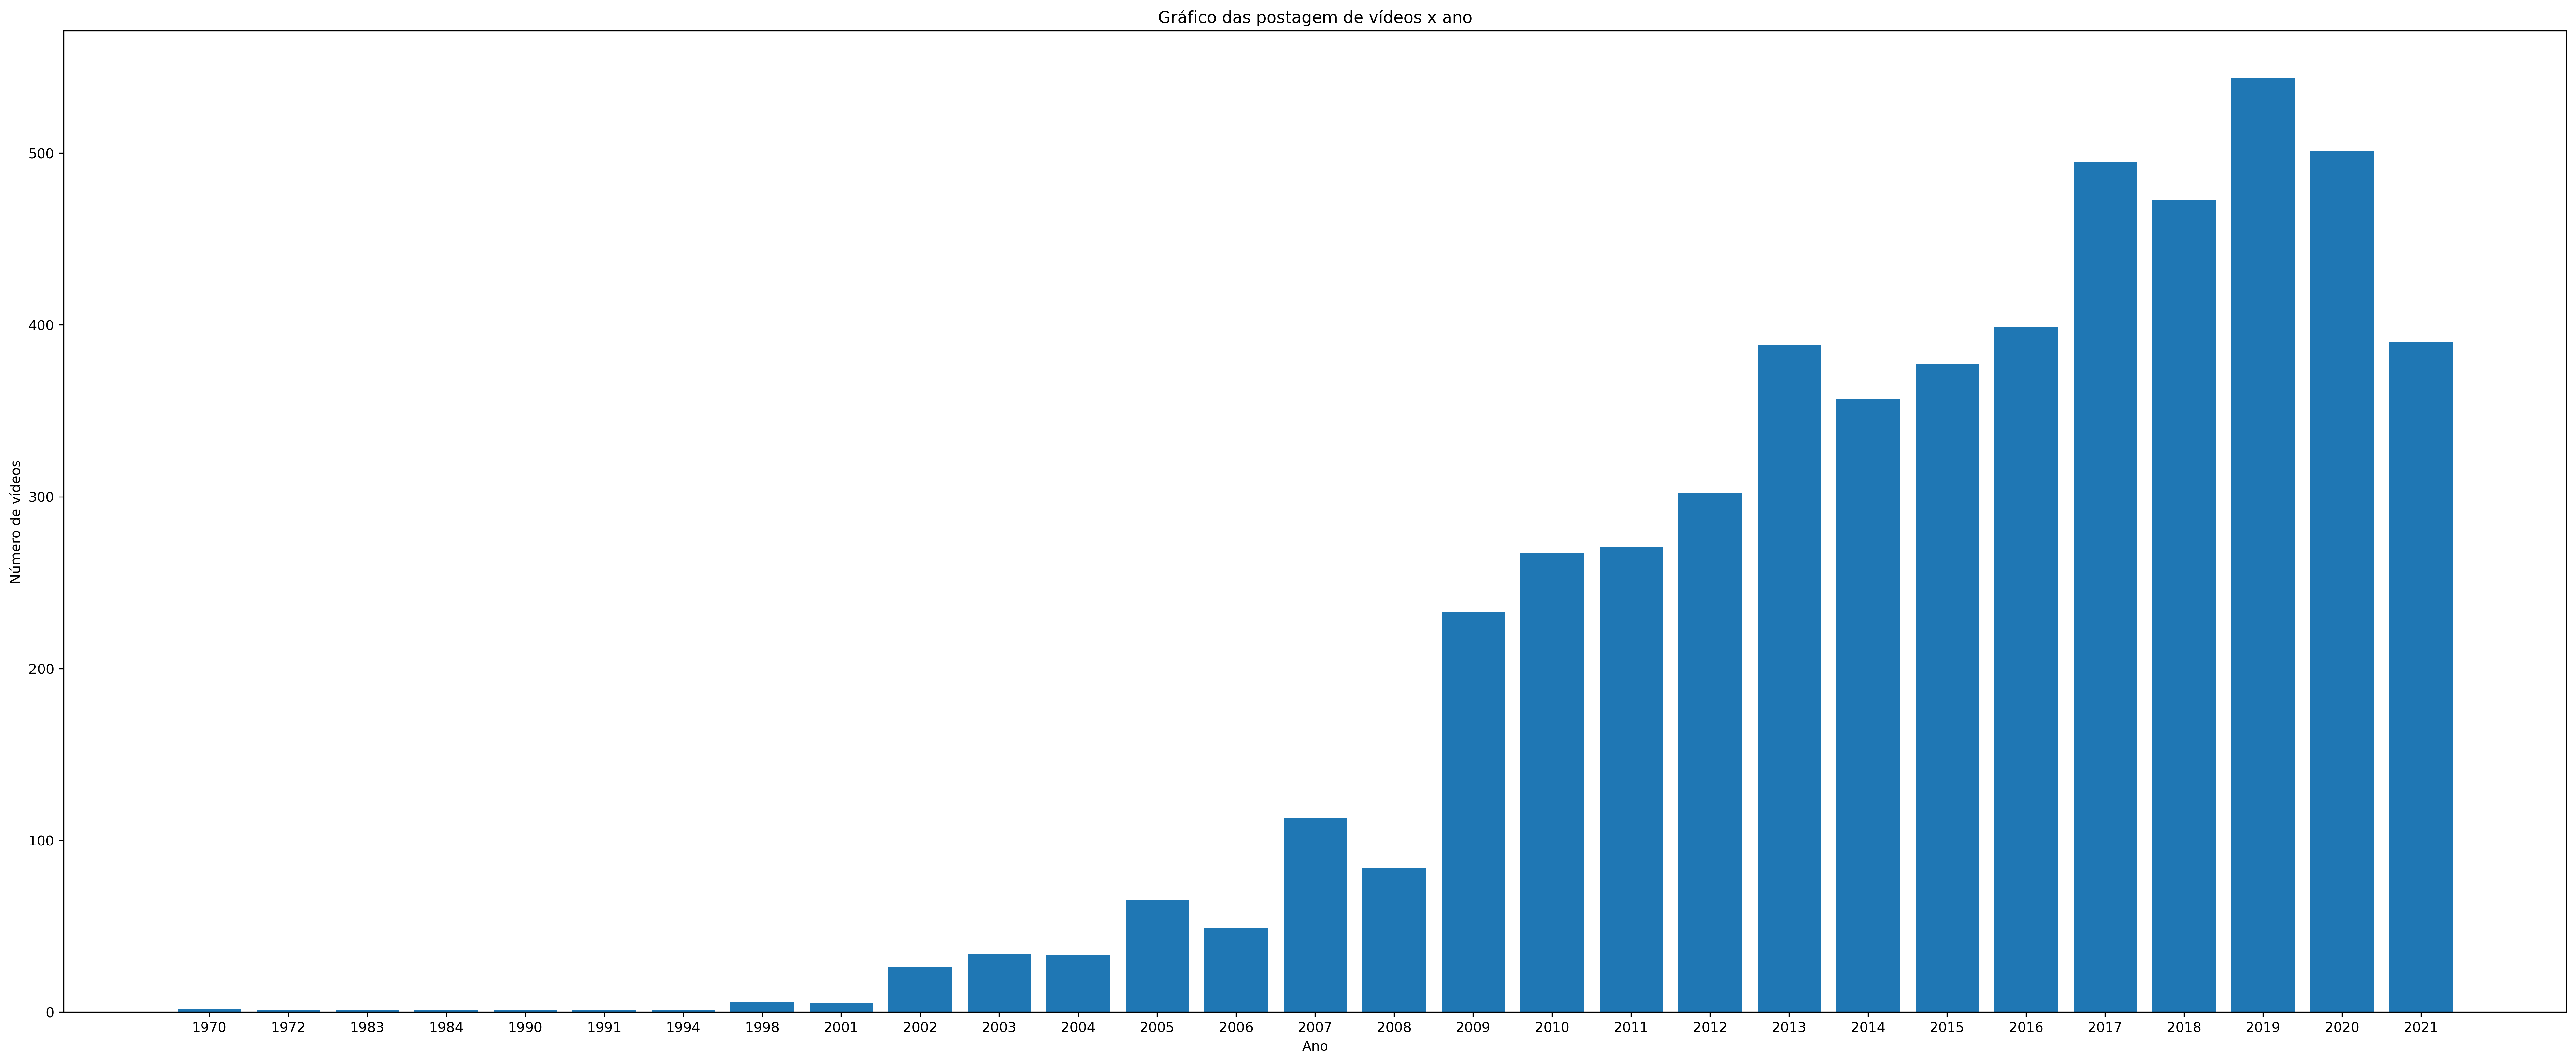

In [239]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.7,1])
ax.bar(anossemrep['Ano'],anossemrep['Vídeos por ano'])
plt.xlabel('Ano')
plt.ylabel('Número de vídeos')
plt.title('Gráfico das postagem de vídeos x ano')
plt.show()

# - Quantidade de views:

### Vizualização por ano

In [240]:
viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['View per year']).reset_index().drop(columns=['index'])


In [241]:
# Data Frame dos anos, vídeos por ano e a quantidade de views por ano

anossemrep = anossemrep.join(viewyear)


### Plotando gráfico do total de views x ano

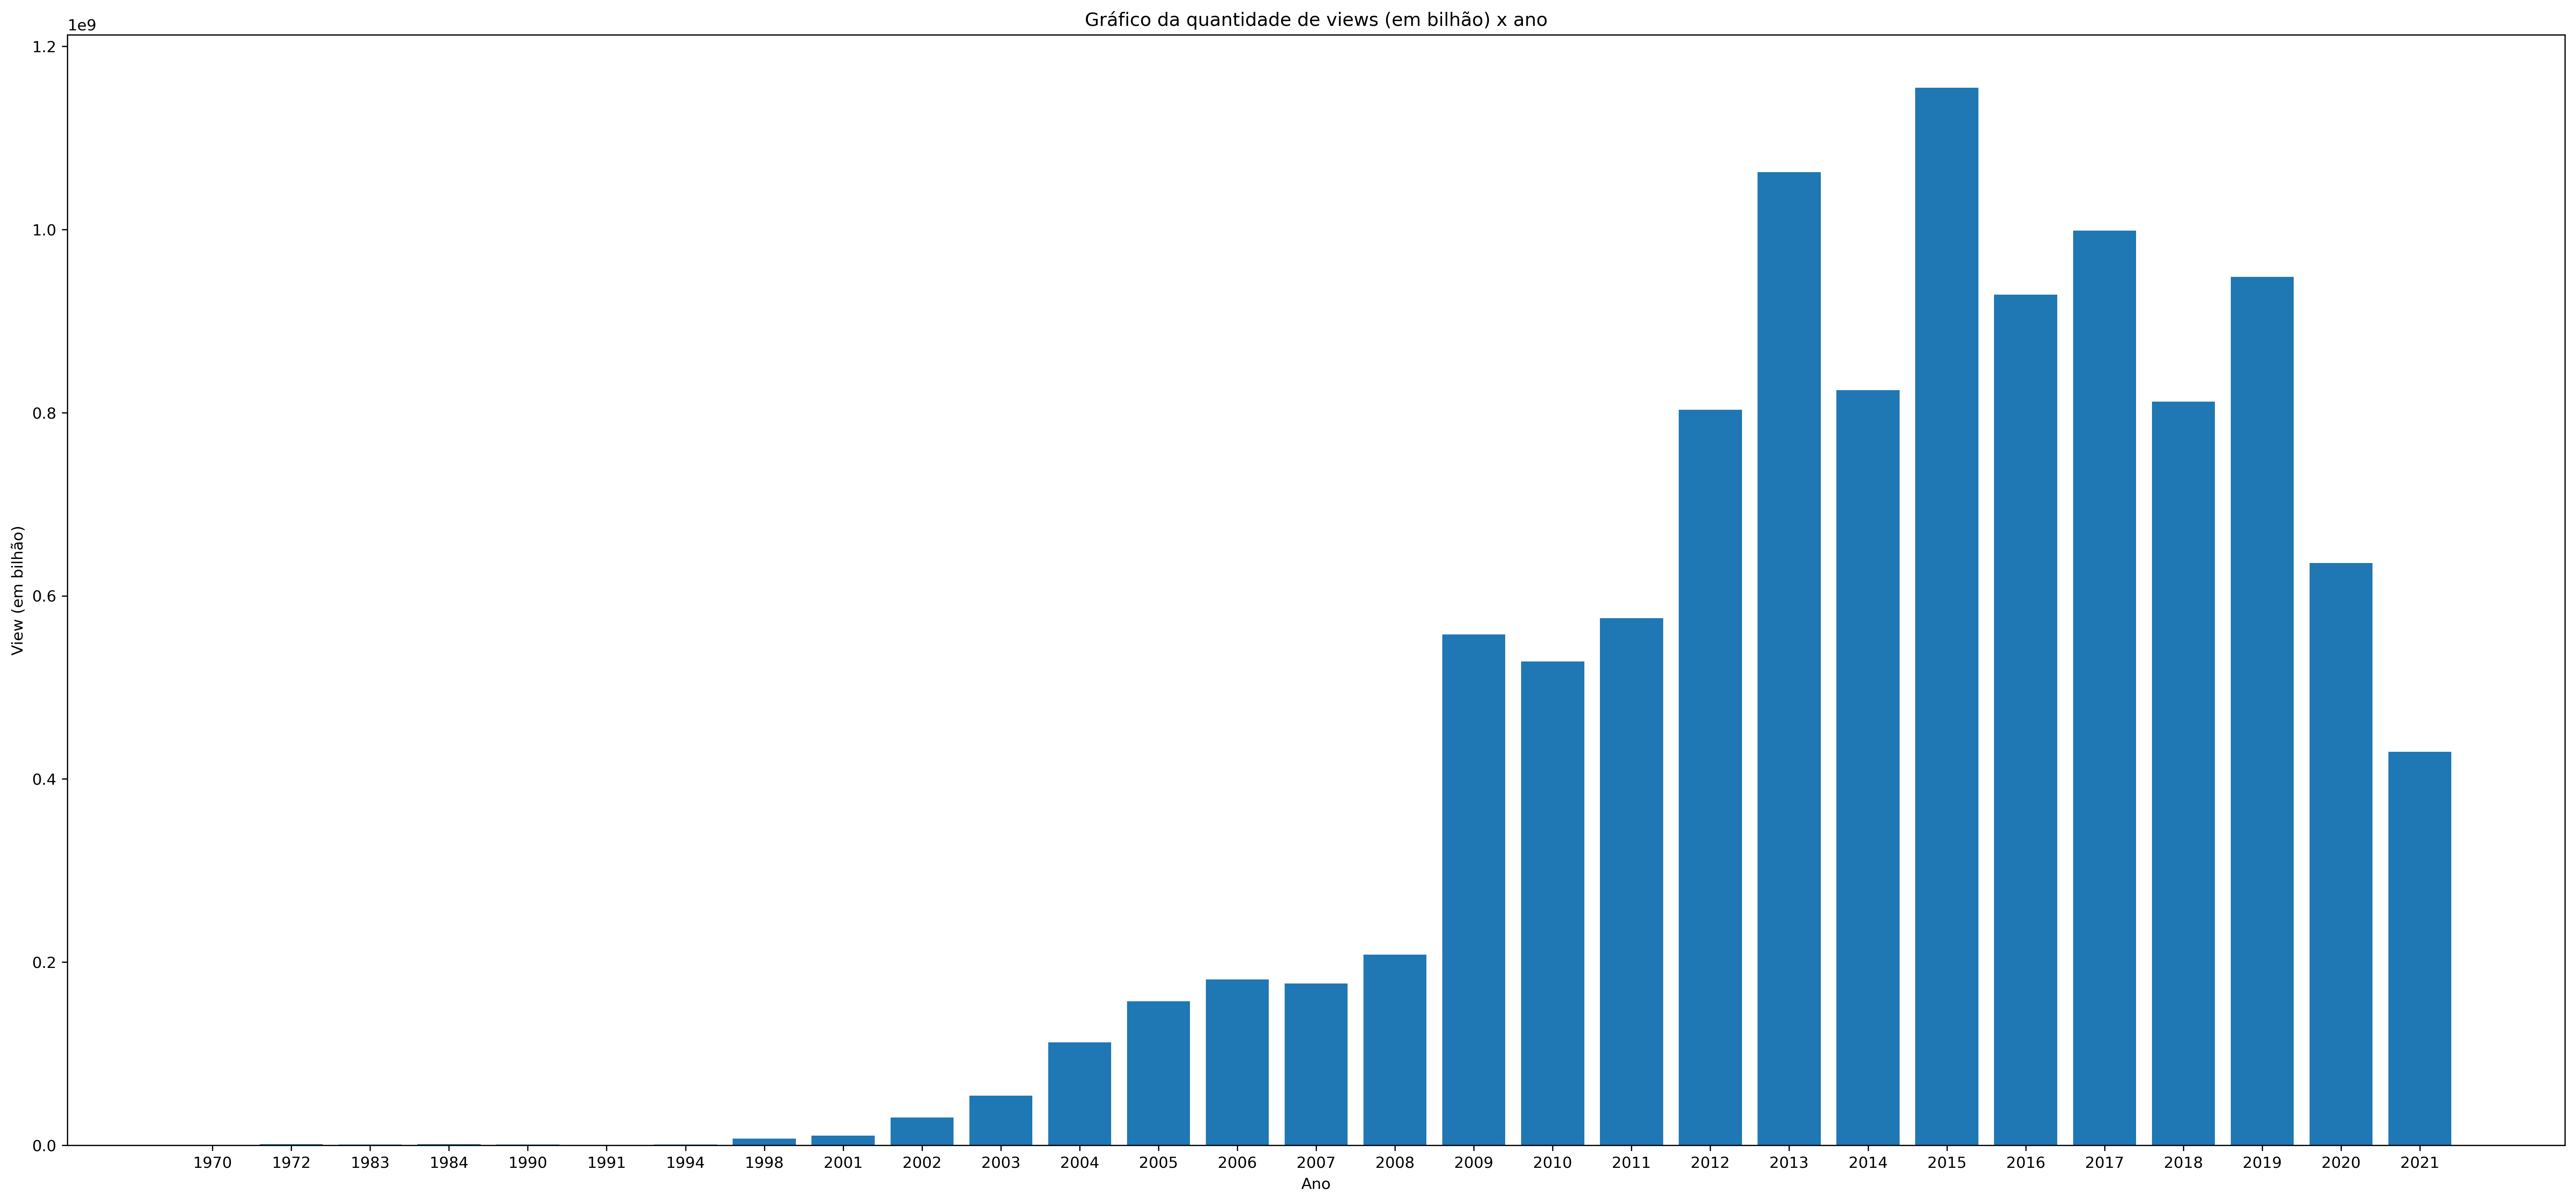

In [242]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],anossemrep['View per year'])
plt.xlabel('Ano')
plt.ylabel('View (em bilhão)')
plt.title('Gráfico da quantidade de views (em bilhão) x ano')
plt.show()

### Média de views por ano:


In [243]:
media_views = pd.DataFrame(anossemrep['View per year'] / anossemrep['Vídeos por ano'], columns=['Média de views']).round(2)


### Plotando gráfico da média de views por vídeo x ano

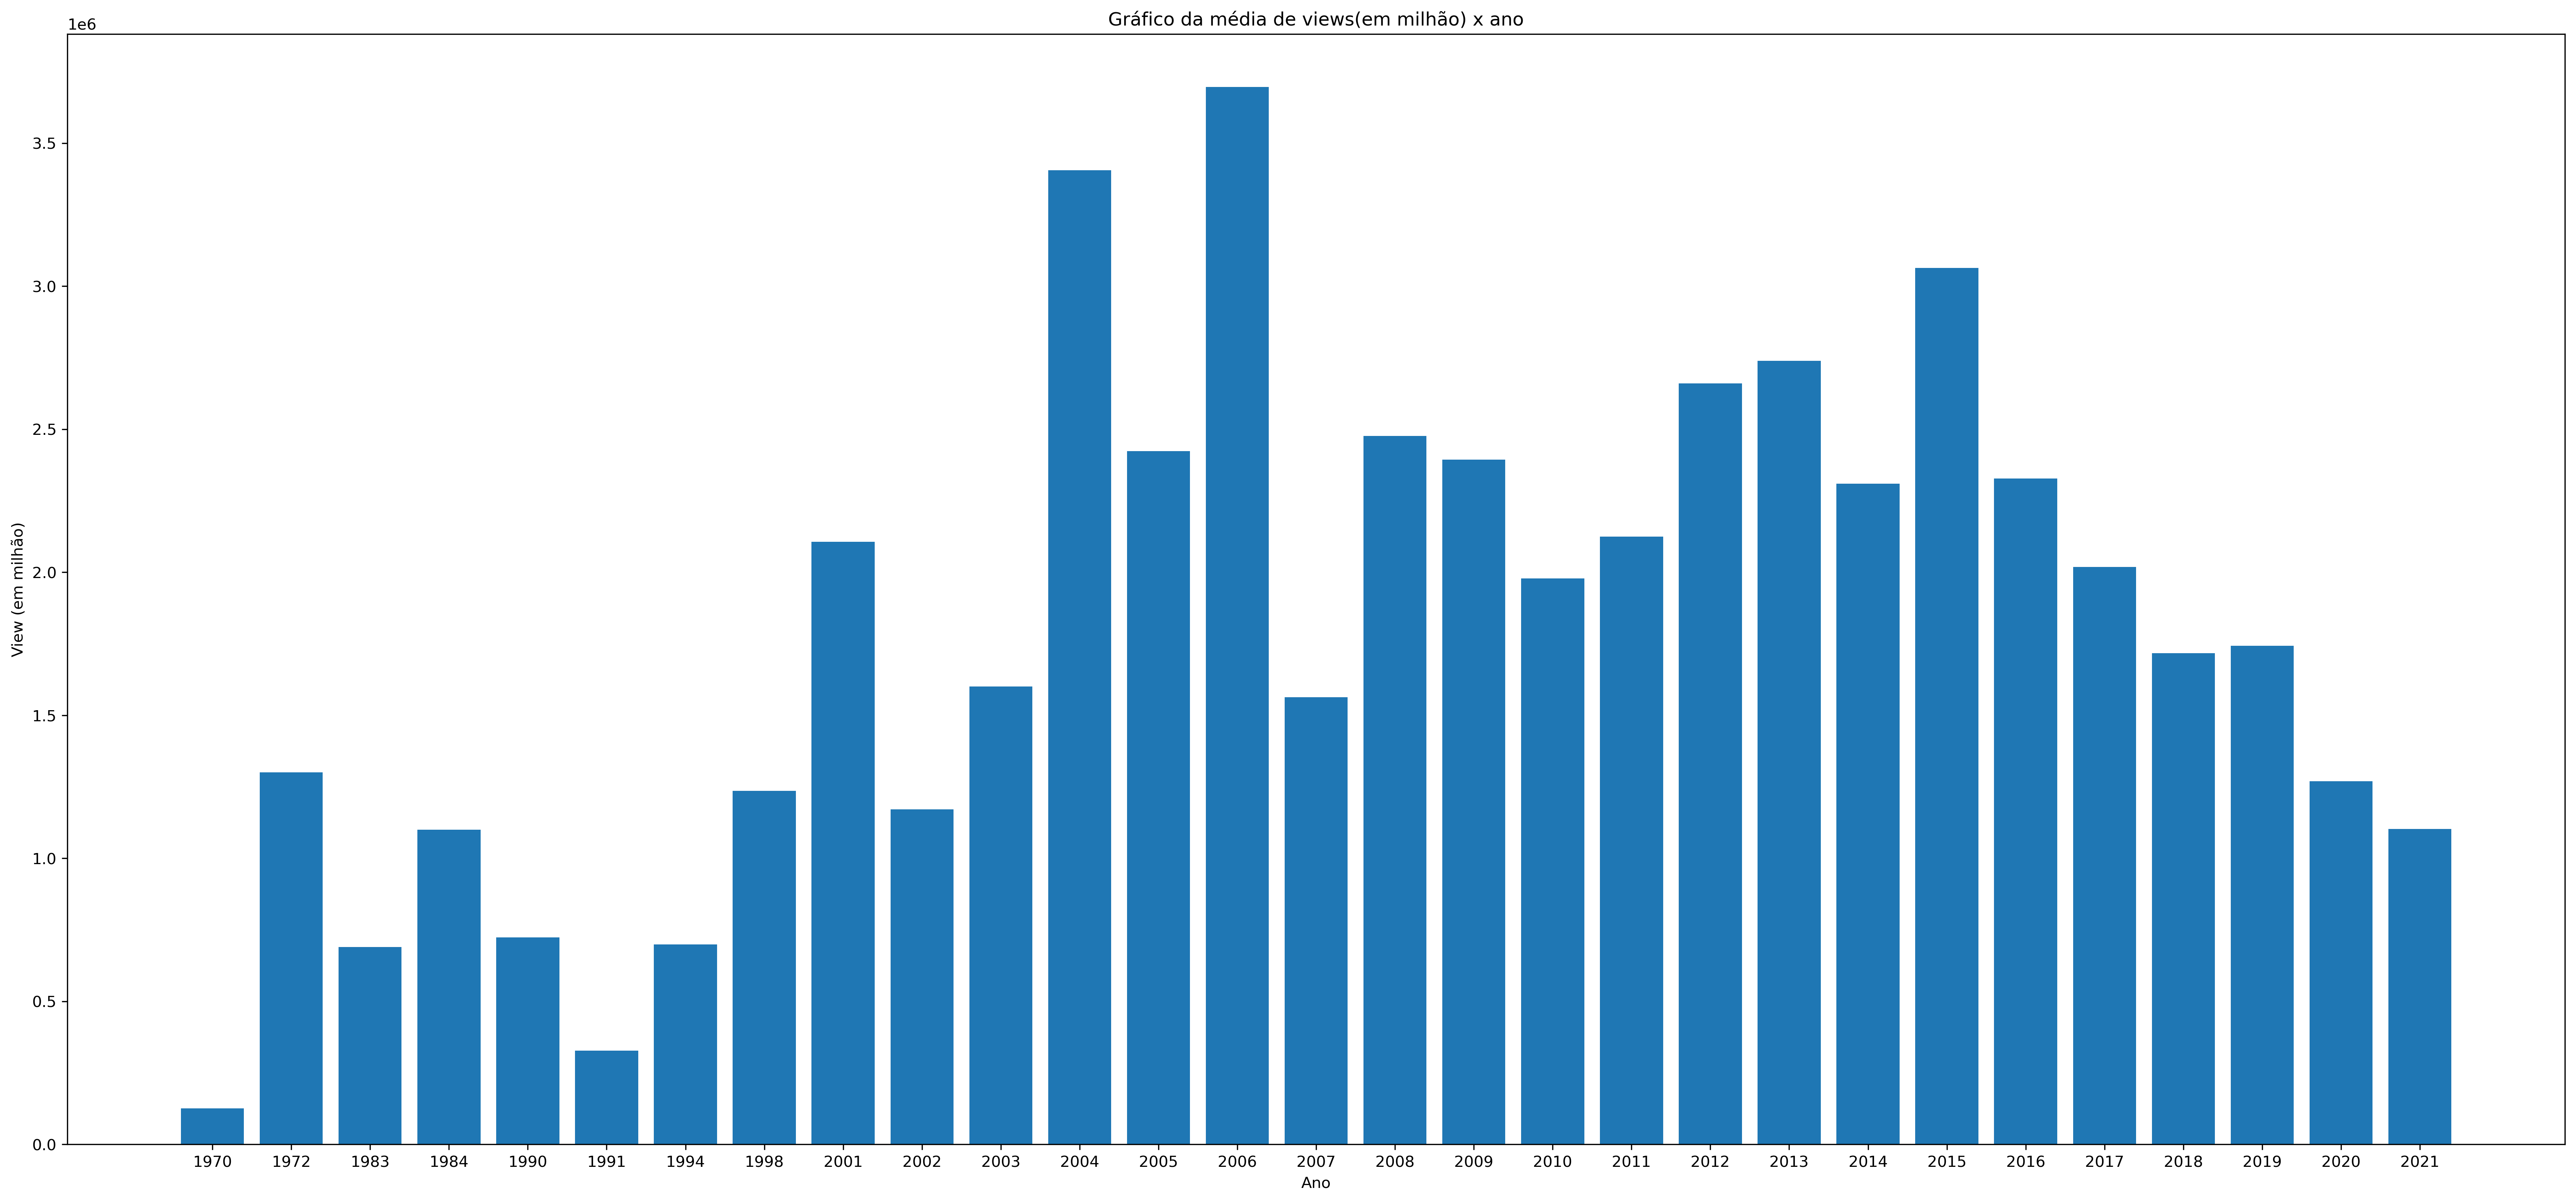

In [244]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],media_views['Média de views'])
plt.xlabel('Ano')
plt.ylabel('View (em milhão)')
plt.title('Gráfico da média de views(em milhão) x ano')
plt.show()

# - Quantidade de likes: 

### Likes por ano

In [245]:
likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['likes']).reset_index().drop(columns=['index'])


In [246]:
# Data Frame dos anos, vídeos por ano, a quantidade de views por ano e likes

anossemrep = anossemrep.join(likes)


### Plotando gráfico do total de likes x ano

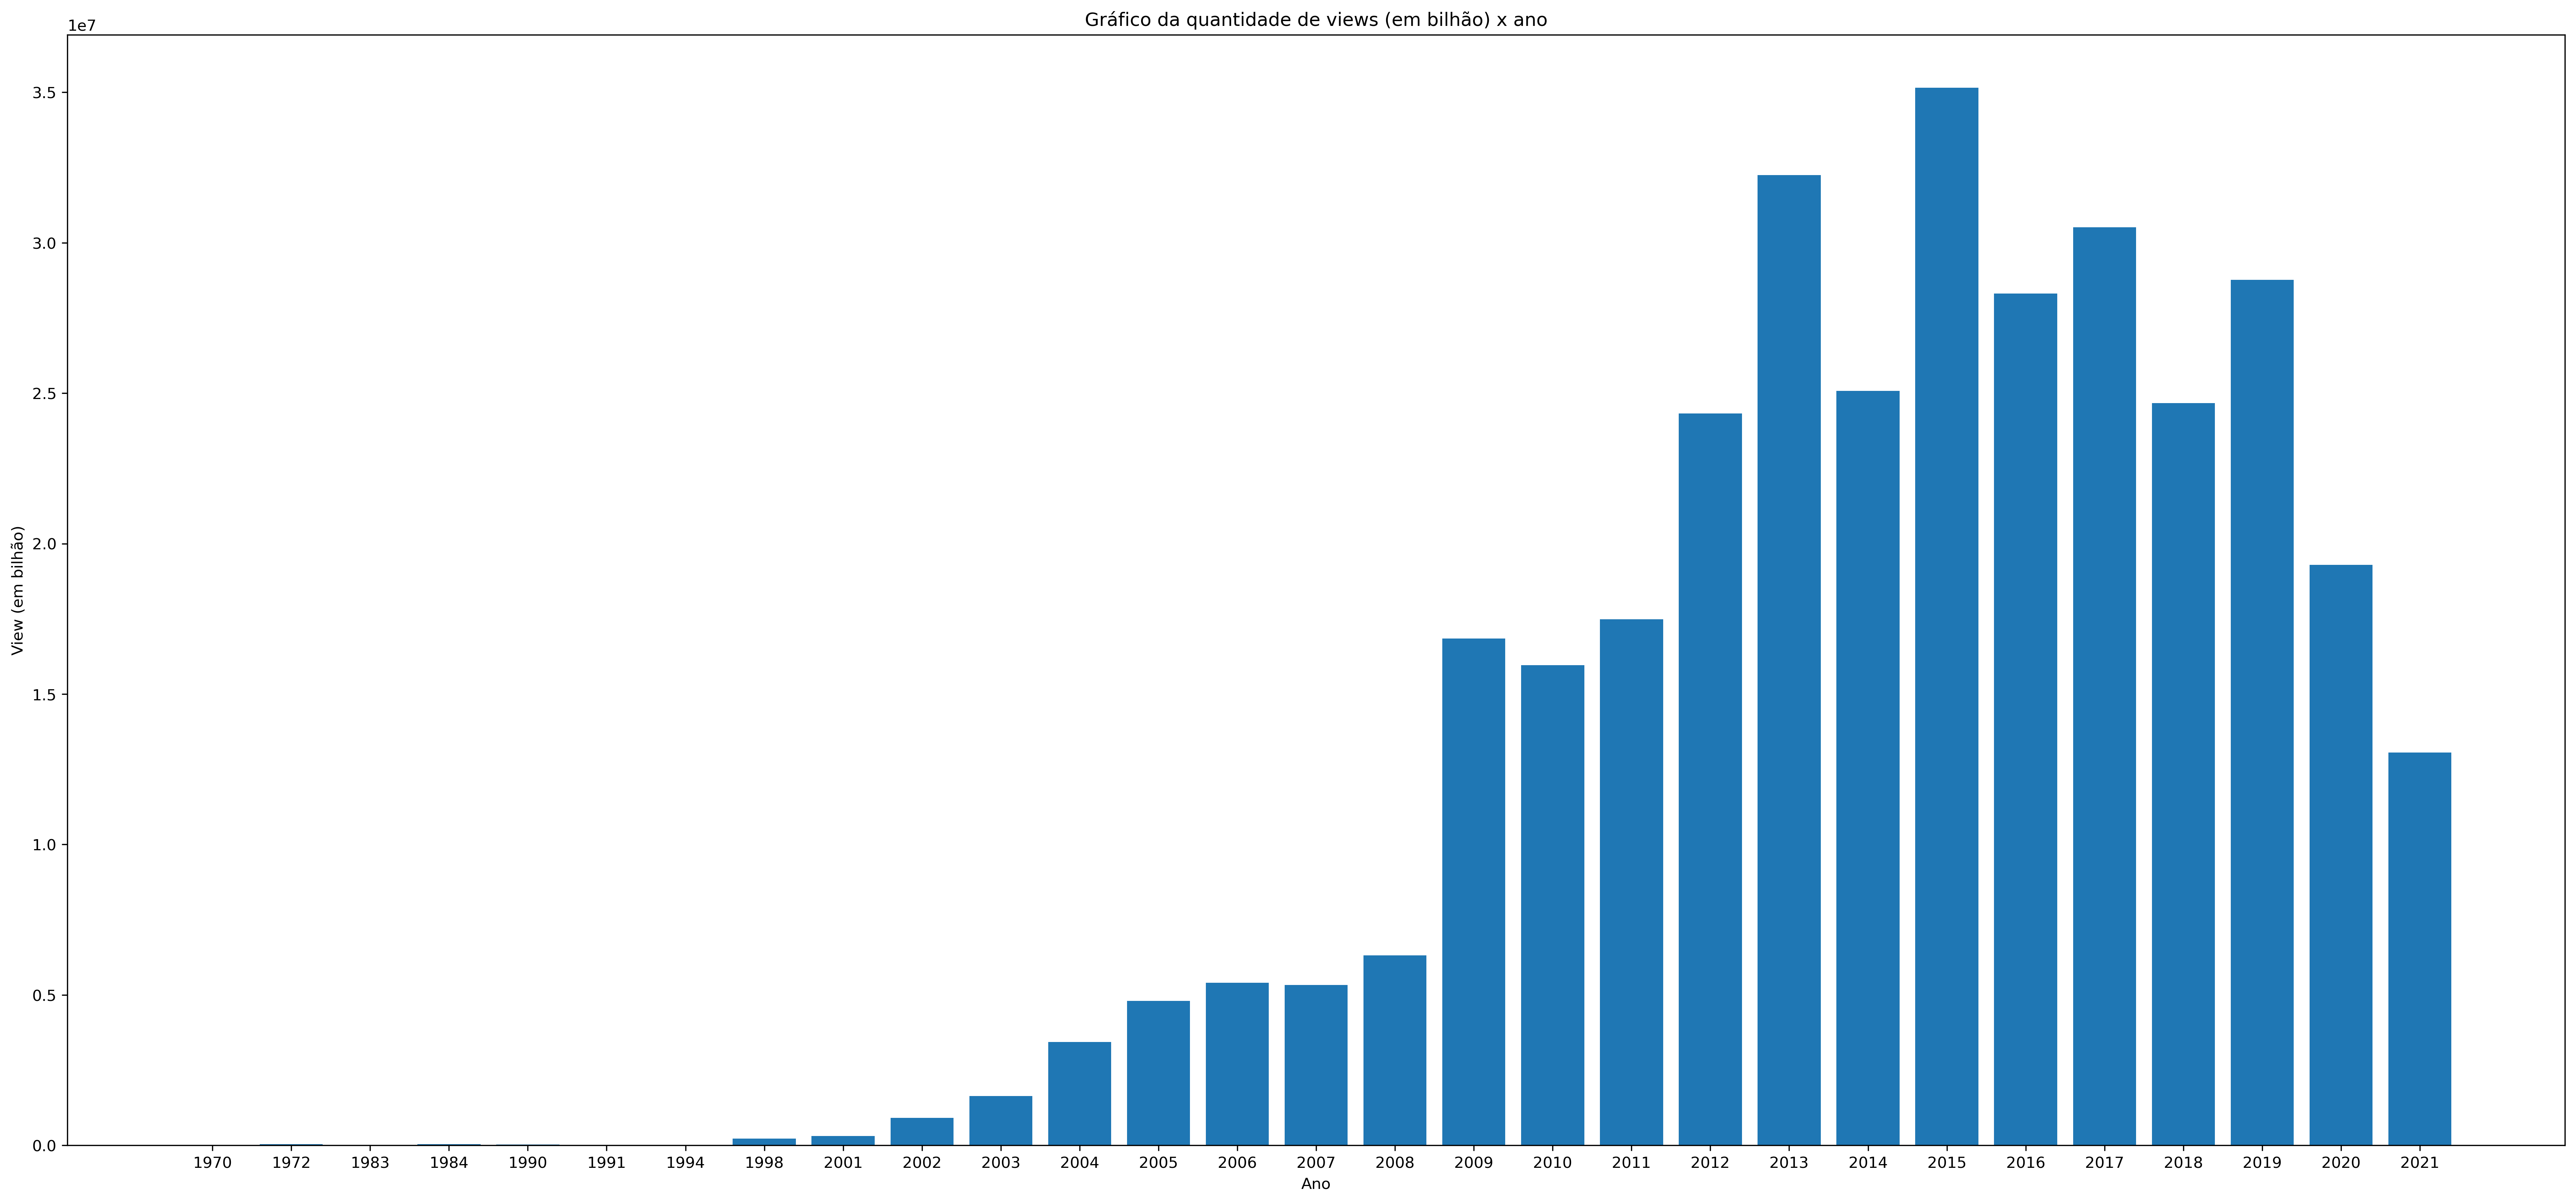

In [247]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],anossemrep['likes'])
plt.xlabel('Ano')
plt.ylabel('View (em bilhão)')
plt.title('Gráfico da quantidade de views (em bilhão) x ano')
plt.show()

### Média de likes por ano:

In [248]:
media_like = pd.DataFrame(anossemrep['likes'] / anossemrep['Vídeos por ano'], columns=['Média de likes']).round(2)


### Plotando gráfico da média de likes por vídeo x ano:


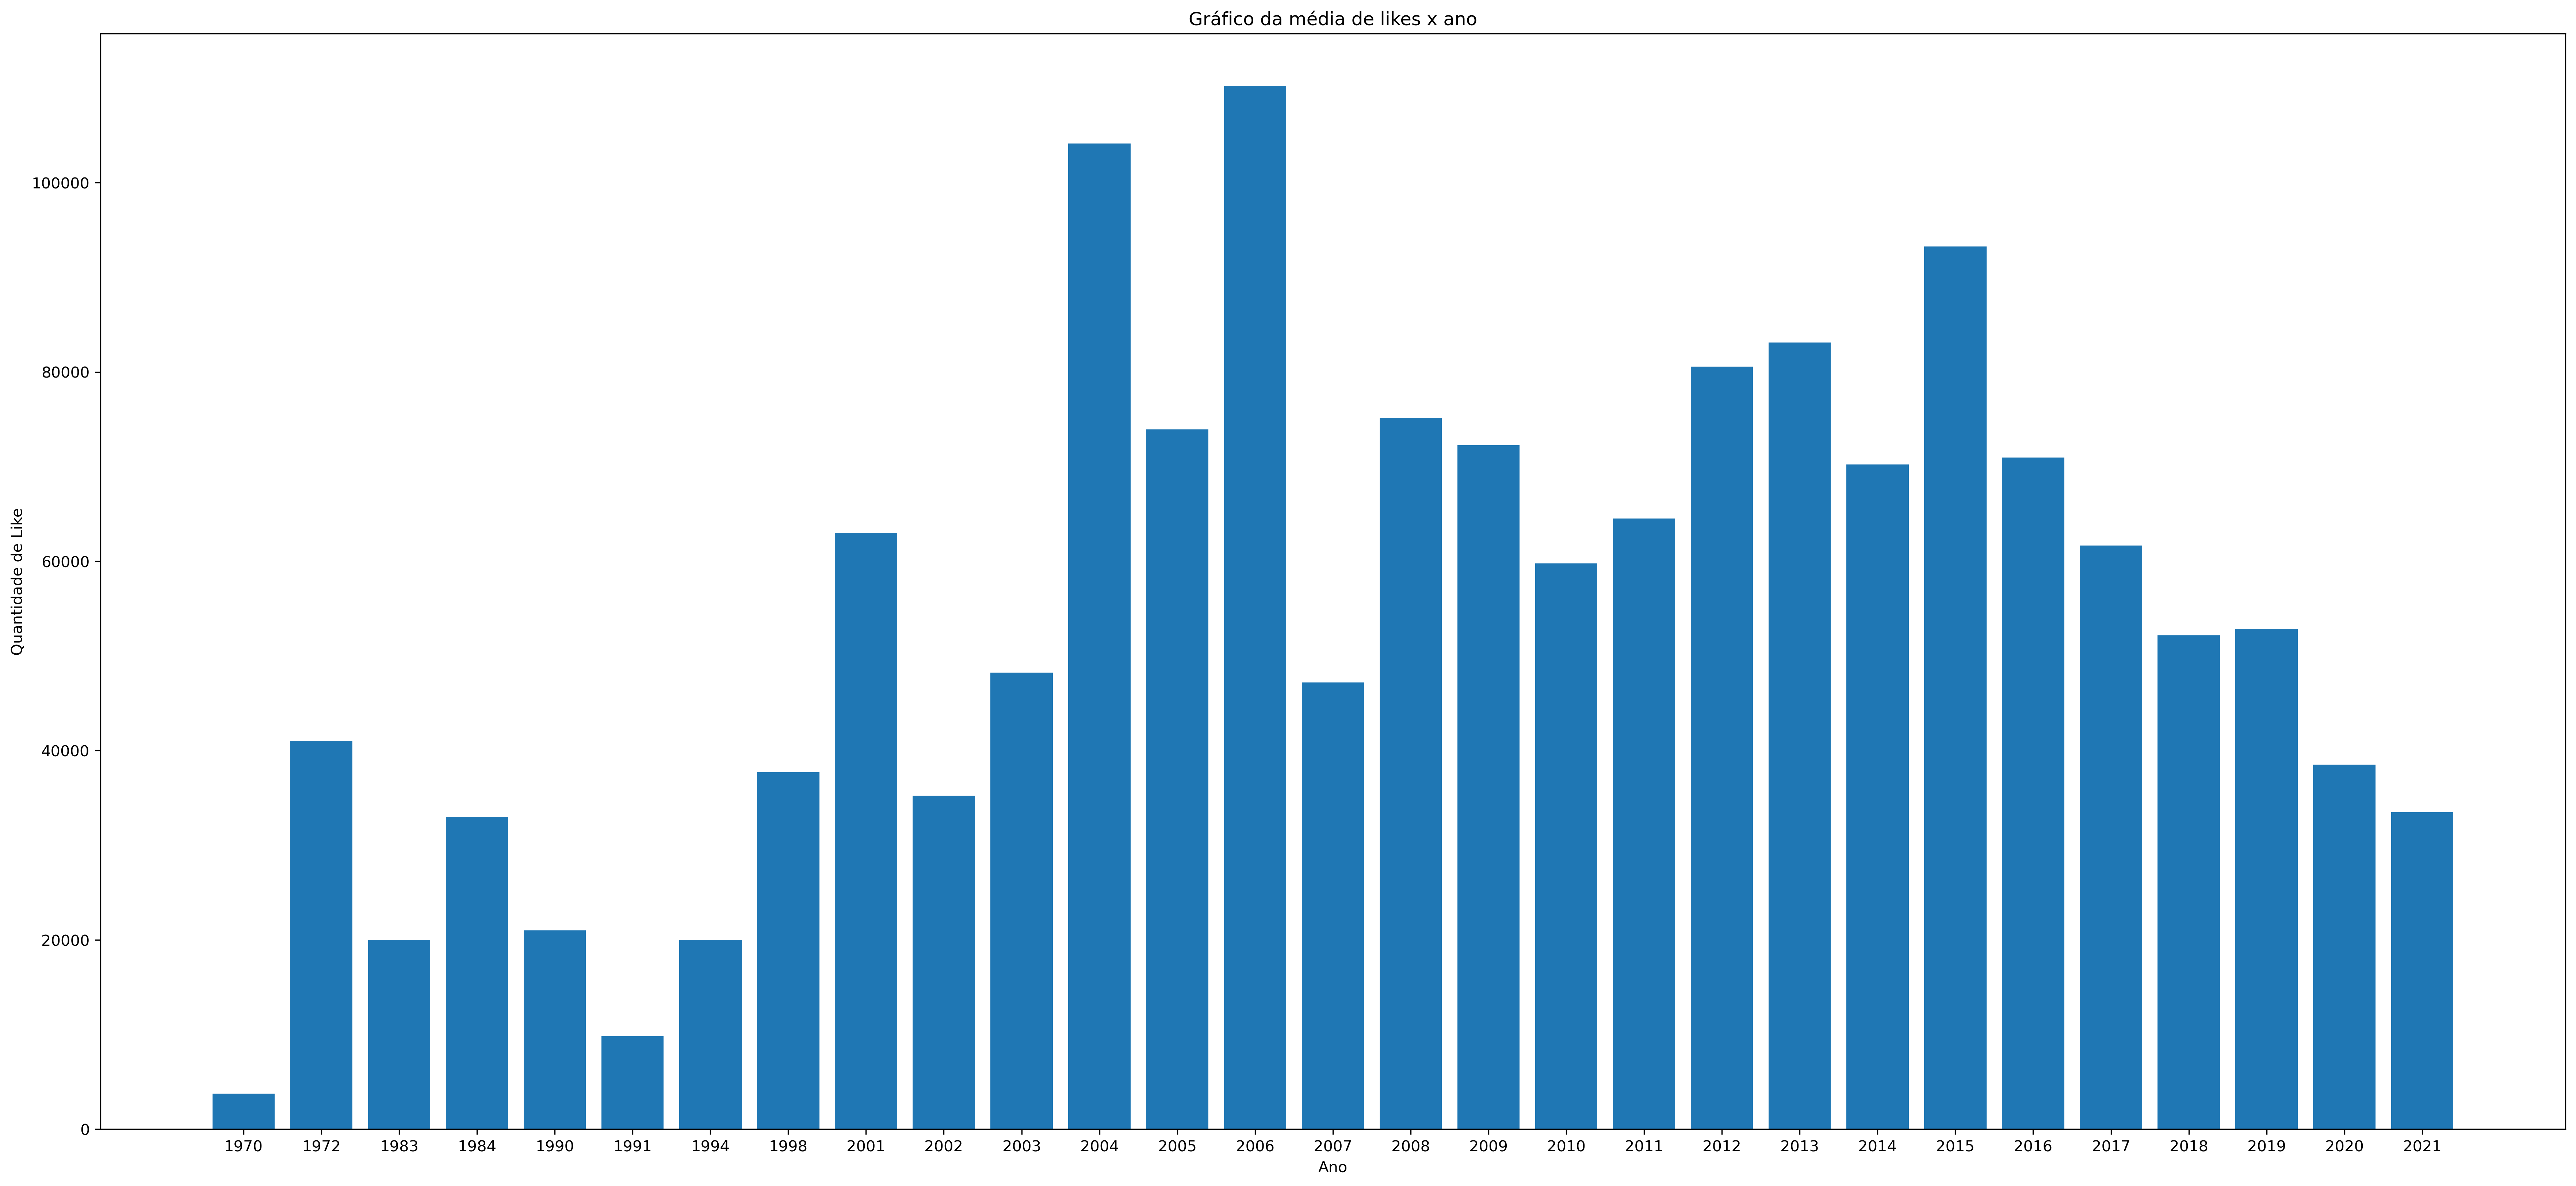

In [252]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],media_like['Média de likes'])
plt.xlabel('Ano')
plt.ylabel('Quantidade de Like')
plt.title('Gráfico da média de likes x ano')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Medidas de tendências:

In [250]:
media_views['Média de views'].std()

892578.4953269627

<AxesSubplot:>

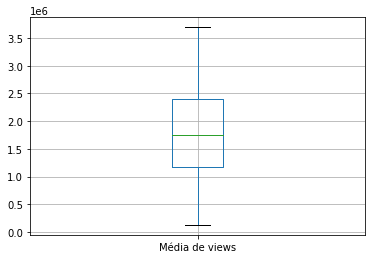

In [253]:
media_views.boxplot(column='Média de views')

<AxesSubplot:>

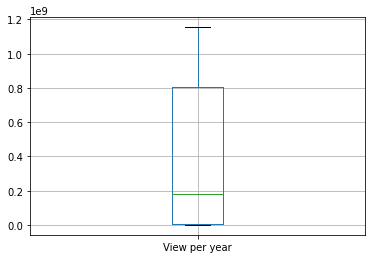

In [260]:
anossemrep.boxplot(column='View per year')

In [263]:
media_like['Média de likes'].std()

27144.698993585218

<AxesSubplot:>

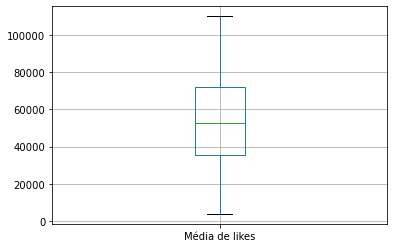

In [265]:
media_like.boxplot(column='Média de likes')

# Correlação entre vizualização por ano e likes por ano:

<AxesSubplot:xlabel='View per year', ylabel='likes'>

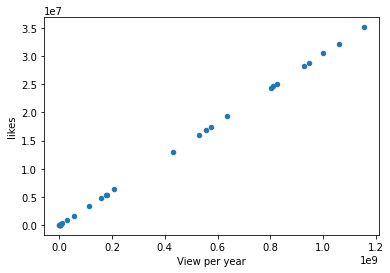

In [256]:
anossemrep.plot.scatter(x = 'View per year', y=  'likes')

In [257]:
anossemrep[['likes', 'View per year']].corr()

,likes,View per year
likes,1.000000,0.999991
View per year,0.999991,1.000000


# Correlação entre vizualização por ano e quantidade de vídeos por ano:


<AxesSubplot:xlabel='View per year', ylabel='Vídeos por ano'>

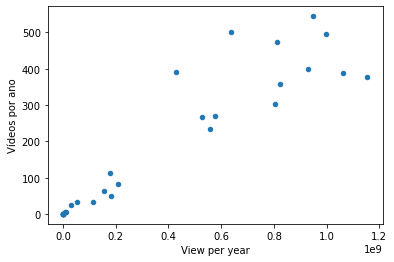

In [254]:
anossemrep.plot.scatter(x = 'View per year', y=  'Vídeos por ano')

In [255]:
anossemrep[['Vídeos por ano', 'View per year']].corr()

,Vídeos por ano,View per year
Vídeos por ano,1.000000,0.929148
View per year,0.929148,1.000000


# Correlação entre vídeos por ano e quantidade de likes

<AxesSubplot:xlabel='Vídeos por ano', ylabel='likes'>

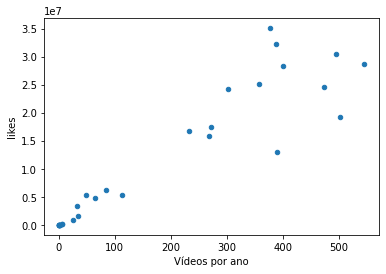

In [258]:
anossemrep.plot.scatter(x = 'Vídeos por ano', y=  'likes')

In [259]:
anossemrep[['likes', 'Vídeos por ano']].corr()

,likes,Vídeos por ano
likes,1.000000,0.929093
Vídeos por ano,0.929093,1.000000
